In [5]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pylab,six,matplotlib 
from matplotlib import markers,lines,colors
from scipy import interpolate
mk=np.tile(markers.MarkerStyle.filled_markers,3)
ck=list(six.iteritems(colors.cnames))
matplotlib.rc('font',family='serif',size=9)
#from matplotlib2tikz import save as tikz_save
import ht

lk = np.tile(['-', '--', '-.', ':'],4)
mk=np.tile(['o','s','<','D','>','h','p','x','d','^'],3)
ck= plt.rcParams['axes.prop_cycle'].by_key()['color']
plt.rcParams['mathtext.fontset'] = 'dejavuserif'
mpl.rcParams['xtick.labelsize'] = 16;
mpl.rcParams['xtick.labelsize'] = 16;
mpl.rcParams['ytick.labelsize'] = 16;
mpl.rcParams['font.family'] = 'serif';
mpl.rcParams['axes.labelsize'] = 16

In [6]:
U = 275 # W/m^2/K
A = 10.82 # m^2
Cp_oil = 1900 # J/kg/K
Cp_steam = 1860 # J/kg/K
m_steam = 5.2 # kg/s
m_oil = 0.725 # kg/s
Thi = 130 # °C
Tci = 15 # °C


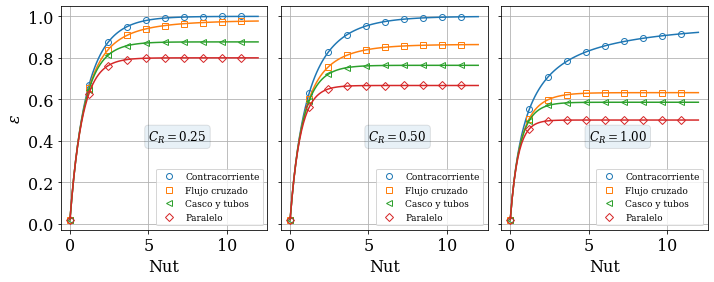

In [7]:
fig0,ax0s = plt.subplots(1,3,figsize=(10,4),sharex=True,sharey=True)

for j,Cr in enumerate([0.25,0.5,1]):
    ax0 = ax0s[j]
    data = []
    for A in np.linspace(0.1,60,100):
        Cmin = ht.calc_Cmin(mh=m_steam, mc=m_oil, Cph=Cp_steam, Cpc=Cp_oil)
        Cmax = ht.calc_Cmax(mh=m_steam, mc=m_oil, Cph=Cp_steam, Cpc=Cp_oil)
        #Cr = ht.calc_Cr(mh=m_steam, mc=m_oil, Cph=Cp_steam, Cpc=Cp_oil)
        #Cr=.5
        NTU = ht.NTU_from_UA(UA=U*A, Cmin=Cmin)
        eff1 = ht.effectiveness_from_NTU(NTU=NTU, Cr=Cr, subtype='counterflow')
        eff3 = ht.effectiveness_from_NTU(NTU=NTU, Cr=Cr, subtype='S&T')
        eff2 = ht.effectiveness_from_NTU(NTU=NTU, Cr=Cr, subtype='crossflow, mixed Cmin')
        eff4 = ht.effectiveness_from_NTU(NTU=NTU, Cr=Cr, subtype='parallel')
        #print(NTU)
        data.append((NTU,eff1,eff2,eff3,eff4))
    data=np.asarray(data).T  
    etiqs = ('Contracorriente','Flujo cruzado','Casco y tubos','Paralelo')
    for i in range(4):
        ax0.plot(data[0],data[i+1])
        ax0.plot(data[0,::10],data[i+1,::10],marker=mk[i],color=ck[i],label=etiqs[i],linestyle='none',markerfacecolor='none')
    ax0.text(5,0.4,r'$C_R=%.2f$'%Cr,fontsize=12,bbox={'edgecolor':'black','facecolor':ck[0], 'alpha':0.1,'boxstyle':'round'})
    ax0.legend()
    ax0.grid(which='both')
    ax0.set_xlabel(r'Nut')
ax0s[0].set_ylabel(r'$\varepsilon$')
fig0.tight_layout()     
#tikz_save('/home/juan/Documents/Ensenanza/latex/apuntes/intercambiadores/tikzs/eficiencia_nut_serie.tikz')



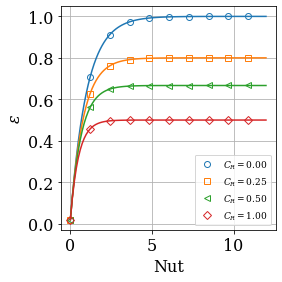

In [10]:
fig0,ax0 = plt.subplots(1,1,figsize=(4,4),sharex=True,sharey=True)
    
ax0.grid(which='both')
for j,Cr in enumerate([0,0.25,0.5,1]):
    data = []
    for A in np.linspace(0.1,60,100):
        Cmin = ht.calc_Cmin(mh=m_steam, mc=m_oil, Cph=Cp_steam, Cpc=Cp_oil)
        Cmax = ht.calc_Cmax(mh=m_steam, mc=m_oil, Cph=Cp_steam, Cpc=Cp_oil)
        #Cr = ht.calc_Cr(mh=m_steam, mc=m_oil, Cph=Cp_steam, Cpc=Cp_oil)
        #Cr=.5
        NTU = ht.NTU_from_UA(UA=U*A, Cmin=Cmin)

        eff4 = ht.effectiveness_from_NTU(NTU=NTU, Cr=Cr, subtype='parallel')
        #print(NTU)
        data.append((NTU,eff4))
    data=np.asarray(data).T  
    ax0.plot(data[0],data[1])
    ax0.plot(data[0,::10],data[1,::10],marker=mk[j],color=ck[j],label='$C_R=%.2f$'%Cr,linestyle='none',markerfacecolor='none')
    #ax0.text(5,0.4,r'$C_R=%.2f$'%Cr,fontsize=12,bbox={'edgecolor':'black','facecolor':ck[0], 'alpha':0.1,'boxstyle':'round'})
    ax0.legend()

    ax0.set_xlabel(r'Nut')
    ax0.set_ylabel(r'$\varepsilon$')
fig0.tight_layout()
    #tikz_save('/home/juan/Documents/Ensenanza/latex/apuntes/intercambiadores/tikzs/eficiencia_nut_paralelo.tikz')



<IPython.core.display.Javascript object>


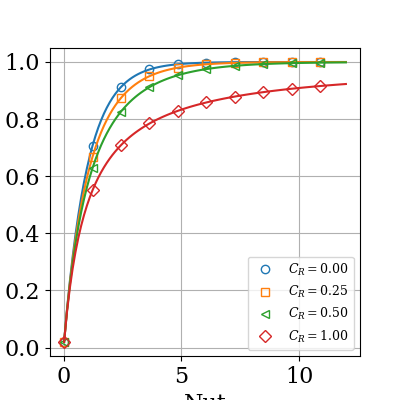

In [21]:
fig0,ax0 = plt.subplots(1,1,figsize=(4,4),sharex=True,sharey=True)
    
ax0.grid(which='both')
for j,Cr in enumerate([0,0.25,0.5,1]):
    data = []
    for A in np.linspace(0.1,60,100):
        Cmin = ht.calc_Cmin(mh=m_steam, mc=m_oil, Cph=Cp_steam, Cpc=Cp_oil)
        Cmax = ht.calc_Cmax(mh=m_steam, mc=m_oil, Cph=Cp_steam, Cpc=Cp_oil)
        #Cr = ht.calc_Cr(mh=m_steam, mc=m_oil, Cph=Cp_steam, Cpc=Cp_oil)
        #Cr=.5
        NTU = ht.NTU_from_UA(UA=U*A, Cmin=Cmin)

        eff4 = ht.effectiveness_from_NTU(NTU=NTU, Cr=Cr, subtype='counterflow')
        #print(NTU)
        data.append((NTU,eff4))
    data=np.asarray(data).T  
    ax0.plot(data[0],data[1])
    ax0.plot(data[0,::10],data[1,::10],marker=mk[j],color=ck[j],label='$C_R=%.2f$'%Cr,linestyle='none',markerfacecolor='none')
    #ax0.text(5,0.4,r'$C_R=%.2f$'%Cr,fontsize=12,bbox={'edgecolor':'black','facecolor':ck[0], 'alpha':0.1,'boxstyle':'round'})
    ax0.legend()

    ax0.set_xlabel(r'Nut')
    ax0.set_ylabel(r'$\varepsilon$')
    #fig0s[j].tight_layout()
    tikz_save('/home/juan/Documents/Ensenanza/latex/apuntes/intercambiadores/tikzs/eficiencia_nut_cc.tikz')



In [52]:
ax0.grid?

<IPython.core.display.Javascript object>


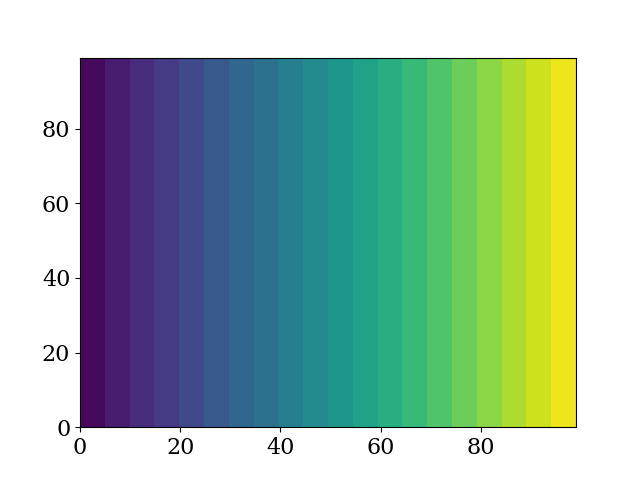

In [24]:
x1 = np.linspace(0,1,100)
x,y=np.meshgrid(x1,x1)
fig1,ax1= plt.subplots()
ax1.contourf(x,20)

In [25]:
cmap = matplotlib.cm.get_cmap('viridis')

In [31]:
cmap(128)

(0.127568, 0.566949, 0.550556, 1.0)